### Loading the data
- First we load statueses from the json file
- As you can see in the code below

In [10]:
import json

# Read the 600 statuses from the json file
with open("./data/esc2023_600statuses_pre-final_de.json", "r") as file:
    try:
        statuses = json.load(file)
    except :
        print("Can't read json file")



### Obtaining data
- Getting status text
- Getting screen names
- Getting hashtags
- Getting words in text

In [11]:
status_texts = [status['text'] for status in statuses]

screen_names = [user_mention['screen_name'] for status in statuses
                for user_mention in status['entities']['user_mentions']]

hashtags = [hashtag['text'] for status in statuses

            for hashtag in status['entities']['hashtags']]
words = [w for t in status_texts
         for w in t.split()] 

### Analyse data
- Print the frequent words, screen_names, hashtags
- Find 5 top frequent in each class
- Print them in table

In [12]:
from collections import Counter
from prettytable import PrettyTable

for label, data in (("Words", words), ("Screen_names", screen_names), ("Hashtags",hashtags)):
    pt = PrettyTable(field_names=(label, "Count"))
    c = Counter(data)
    [pt.add_row(row) for row in c.most_common()[:5]]
    print(pt)
   

+-----------------+-------+
|      Words      | Count |
+-----------------+-------+
|     #ESC2023    |  335  |
|   #Eurovision   |  221  |
| #Eurovision2023 |  138  |
|        RT       |  134  |
|       die       |  113  |
+-----------------+-------+
+-----------------+-------+
|   Screen_names  | Count |
+-----------------+-------+
| berlinerzeitung |   35  |
| WindmaschineESC |   17  |
|  KathaKlarname  |   10  |
|   back_andy_09  |   10  |
|   MikkelMachts  |   9   |
+-----------------+-------+
+----------------+-------+
|    Hashtags    | Count |
+----------------+-------+
|    ESC2023     |  346  |
|   Eurovision   |  235  |
| Eurovision2023 |  138  |
|      ESC       |  114  |
|    esc2023     |  111  |
+----------------+-------+


## Lexical Diversity
- Calcuate number unique words by the number of all words
- Calculate Average_words

In [14]:

pt = PrettyTable(field_names=["Label", "Diversity"])
for label, data in (("Words", words), ("Screen_names", screen_names), ("Hashtags",hashtags)):
    d= len(set(data))/ len(data)
    pt.add_row([label,d ])
print(pt)

def average_words(statuses):
    total_words = sum(map(lambda s: len(s.split()), statuses))
    return total_words/len(statuses)

print(average_words(status_texts)

+--------------+---------------------+
|    Label     |      Diversity      |
+--------------+---------------------+
|    Words     |  0.3381796690307329 |
| Screen_names | 0.39893617021276595 |
|   Hashtags   | 0.07764198418404025 |
+--------------+---------------------+
14.1


## Retweet Analysis
- Finding the Top Retweet

In [15]:
retweets = [(status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'], 
             status['text'])
             for status in statuses
                if 'retweeted_status' in status
            ]
top_retweets = sorted(list(set(retweets)), reverse=True)[:5]
print(top_retweets)

[(350, 'lucaaaa_o', 'RT @lucaaaa_o: A thread with my Pokémon/Eurovision drawing \n#alessandramele 🇳🇴 &amp; Vespiquen \n#Eurovision2023 #ESC2023 #drawing #Pokemon #Eur…'), (69, 'berlinerzeitung', 'RT @berlinerzeitung: #ESC-Veranstalter lassen #Selenskyj abblitzen: Der ukrainische Präsident wird beim Finale des #EurovisionSongContest n…'), (64, 'KathaKlarname', 'RT @KathaKlarname: Wann treten die beiden eigentlich auf? #Eurovision2023 #ESC2023 https://t.co/Xc9rT9ei8X'), (17, 'WindmaschineESC', 'RT @WindmaschineESC: Peter Urban hat mich als seine Freundin bezeichnet!!! ❤❤❤😭#esc2023 #eurovision2023 #eurovision'), (15, 'KathaKlarname', 'RT @KathaKlarname: Menstruierende Menschen kennen dieses Problem. #Eurovision2023 #ESC2023 https://t.co/fZF8NbVTyn')]


## Ploting
- Ranked Plots
- Histograms

335
2861


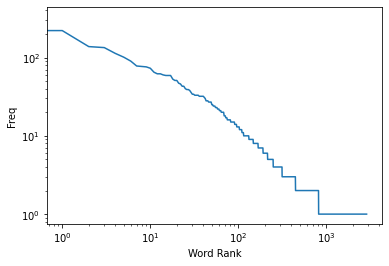

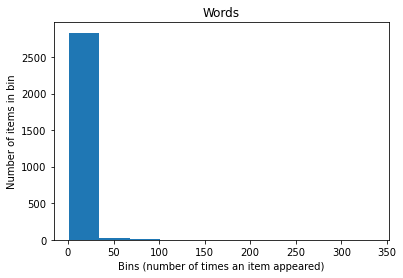

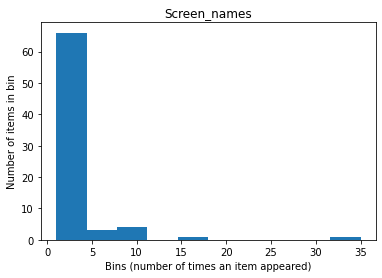

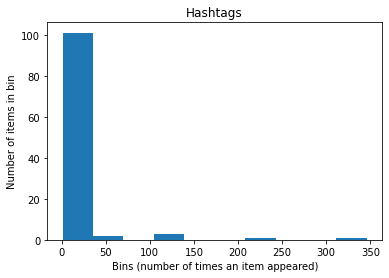

<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
word_counts = sorted(Counter(words).values(), reverse=True)
print(word_counts[0])
print(len(word_counts))
plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.figure()

for label, data in (("Words", words), ("Screen_names", screen_names), ("Hashtags",hashtags)):
    c = Counter(data)
    plt.hist(c.values())
    
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")

    plt.figure()
